In [1]:
import os
import torch
from PIL import Image
import torchvision.transforms as transforms

def compute_mean_std(dataset_dir):
    transform_to_tensor = transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()
    ])
    
    total_images = 0
    sum_channels = torch.zeros(3)
    sum_squared_channels = torch.zeros(3)
    
    for subdir, dirs, files in os.walk(dataset_dir):
        for file in files:
            image_path = os.path.join(subdir, file)
            image = Image.open(image_path)
            tensor_image = transform_to_tensor(image)
            
            sum_channels += tensor_image.sum(dim=(1, 2))
            sum_squared_channels += (tensor_image ** 2).sum(dim=(1, 2))
            total_images += 1
            
    mean = sum_channels / (total_images * 224 * 224)
    mean_squared = sum_squared_channels / (total_images * 224 * 224)
    variance = mean_squared - mean ** 2
    std = torch.sqrt(variance)

    return mean, std


/home/yao/.conda/envs/pytorch/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset_dir = 'dataset/train/weap'
mean, std = compute_mean_std(dataset_dir)
print(f"Mean: {mean}")
print(f"Standard Deviation: {std}")

Mean: tensor([0.4448, 0.4374, 0.4107])
Standard Deviation: tensor([0.2849, 0.2852, 0.2766])


In [3]:
dataset_dir = 'dataset/train/norm'
mean, std = compute_mean_std(dataset_dir)
print(f"Mean: {mean}")
print(f"Standard Deviation: {std}")

Mean: tensor([0.4911, 0.4745, 0.4436])
Standard Deviation: tensor([0.2888, 0.2853, 0.2833])


In [4]:
dataset_dir = 'dataset/test/weap'
mean, std = compute_mean_std(dataset_dir)
print(f"Mean: {mean}")
print(f"Standard Deviation: {std}")

Mean: tensor([0.4158, 0.3952, 0.3845])
Standard Deviation: tensor([0.2608, 0.2568, 0.2592])


In [5]:
dataset_dir = 'dataset/test/norm'
mean, std = compute_mean_std(dataset_dir)
print(f"Mean: {mean}")
print(f"Standard Deviation: {std}")

Mean: tensor([0.4333, 0.4177, 0.3918])
Standard Deviation: tensor([0.2632, 0.2660, 0.2701])


In [1]:
import numpy as np
(np.array([0.4448, 0.4374, 0.4107])+np.array([0.4911, 0.4745, 0.4436]))/2.0

array([0.46795, 0.45595, 0.42715])

In [2]:
(np.array([0.4158, 0.3952, 0.3845])+np.array([0.4333, 0.4177, 0.3918]))/2.0

array([0.42455, 0.40645, 0.38815])

In [4]:
(np.array([0.2849, 0.2852, 0.2766])+np.array([0.2888, 0.2853, 0.2833]))/2.0

array([0.28685, 0.28525, 0.27995])

In [5]:
(np.array([0.2608, 0.2568, 0.2592])+np.array([0.2632, 0.2660, 0.2701]))/2.0

array([0.262  , 0.2614 , 0.26465])

In [8]:
# Show the distribution
import matplotlib.pyplot as plt
import numpy as np

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image

# Set the paths to the train and test folders
train_folder = 'dataset/train'
test_folder = 'dataset/test'

# Define the target image size
image_size = (128, 128)

norm_images = []
norm_labels = []
weap_images = []
weap_labels = []

# Load the images from the train folder
for class_folder in os.listdir(train_folder):
    if class_folder == 'norm':
        class_label = "train"
        for filename in os.listdir(os.path.join(train_folder, class_folder)):
            if filename.endswith('.png'):
                image = Image.open(os.path.join(train_folder, class_folder, filename)).resize(image_size)
                norm_images.append(np.array(image).flatten())
                norm_labels.append(class_label)
    elif class_folder == 'weap':
        class_label = "train"
        for filename in os.listdir(os.path.join(train_folder, class_folder)):
            if filename.endswith('.png'):
                image = Image.open(os.path.join(train_folder, class_folder, filename)).resize(image_size)
                weap_images.append(np.array(image).flatten())
                weap_labels.append(class_label)
    

# Load the images from the test folder
for class_folder in os.listdir(test_folder):
    if class_folder == 'norm':
        class_label = "test"
        for filename in os.listdir(os.path.join(test_folder, class_folder)):
            if filename.endswith('.png'):
                image = Image.open(os.path.join(test_folder, class_folder, filename)).resize(image_size)
                norm_images.append(np.array(image).flatten())
                norm_labels.append(class_label)

    elif class_folder == 'weap':
        class_label = "test"
        for filename in os.listdir(os.path.join(test_folder, class_folder)):
            if filename.endswith('.png'):
                image = Image.open(os.path.join(test_folder, class_folder, filename)).resize(image_size)
                weap_images.append(np.array(image).flatten())
                weap_labels.append(class_label)

    

/home/yao/.conda/envs/pytorch/lib/python3.8/site-packages/seaborn/_oldcore.py:917: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  val in data


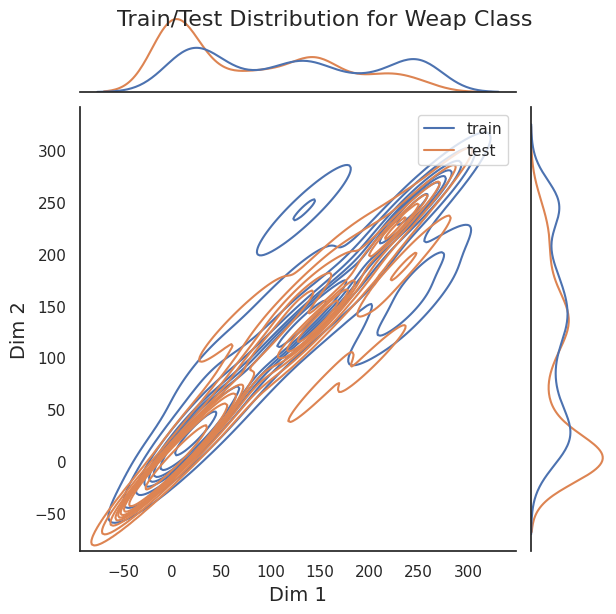

In [41]:
# Create a joint plot with kde for the train dataset
# weap
sns.set(style='white', color_codes=True)
g = sns.jointplot(data=weap_images, x=np.array(weap_images)[:, 2], y=np.array(weap_images)[:, 0], hue=np.array(weap_labels), kind='kde')
# g = sns.jointplot(x=np.array(train_images)[:, 0], y=np.array(train_images)[:, 1], hue=np.array(train_labels), kind='kde', space=0, palette=sns.color_palette(['blue', 'red']))
g.set_axis_labels('Dim 1', 'Dim 2', fontsize=14)
plt.suptitle('Train/Test Distribution for Weap Class', fontsize=16)
plt.savefig("plots/train_test_distr_weap.png")
plt.show()

/home/yao/.conda/envs/pytorch/lib/python3.8/site-packages/seaborn/_oldcore.py:917: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  val in data


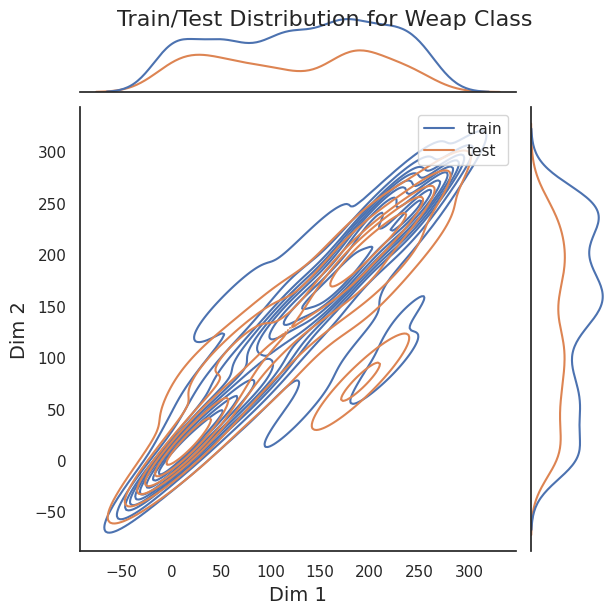

In [42]:
# Create a joint plot with kde for the train dataset
# norm
sns.set(style='white', color_codes=True)
g = sns.jointplot(data=norm_images, x=np.array(norm_images)[:, 2], y=np.array(norm_images)[:, 0], hue=np.array(norm_labels), kind='kde')
# g = sns.jointplot(x=np.array(train_images)[:, 0], y=np.array(train_images)[:, 1], hue=np.array(train_labels), kind='kde', space=0, palette=sns.color_palette(['blue', 'red']))
g.set_axis_labels('Dim 1', 'Dim 2', fontsize=14)
plt.suptitle('Train/Test Distribution for Weap Class', fontsize=16)
plt.savefig("plots/train_test_distr_norm.png")
plt.show()

/home/yao/.conda/envs/pytorch/lib/python3.8/site-packages/seaborn/_oldcore.py:917: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  val in data


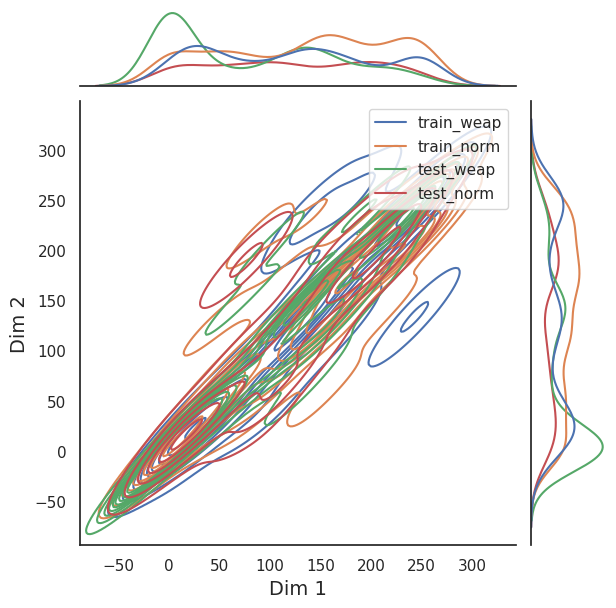

In [22]:
# Create a joint plot with kde for the train dataset
sns.set(style='white', color_codes=True)
g = sns.jointplot(data=images, x=np.array(images)[:, 0], y=np.array(images)[:, 2], hue=np.array(labels), kind='kde')
# g = sns.jointplot(x=np.array(train_images)[:, 0], y=np.array(train_images)[:, 1], hue=np.array(train_labels), kind='kde', space=0, palette=sns.color_palette(['blue', 'red']))
g.set_axis_labels('Dim 1', 'Dim 2', fontsize=14)

# # Add the test dataset to the same plot
# g.x, g.y, g.ax_joint = np.array(test_images)[:, 0], np.array(test_images)[:, 1], g.ax_joint
# sns.kdeplot(data=np.array(test_images), color=['green', 'orange'][test_labels], fill=False, alpha=0.5, ax=g.ax_joint)

# # Set the title and legend
# plt.suptitle('Distribution of Train and Test Datasets', fontsize=16)
# handles, labels = plt.gca().get_legend_handles_labels()
# plt.legend(handles[:2] + handles[2::2], ['Train: Normal', 'Train: Weapon', 'Test: Normal', 'Test: Weapon'], loc='upper right', fontsize=12)

# Show the plot
plt.show()

/home/yao/.conda/envs/pytorch/lib/python3.8/site-packages/seaborn/_oldcore.py:917: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  val in data


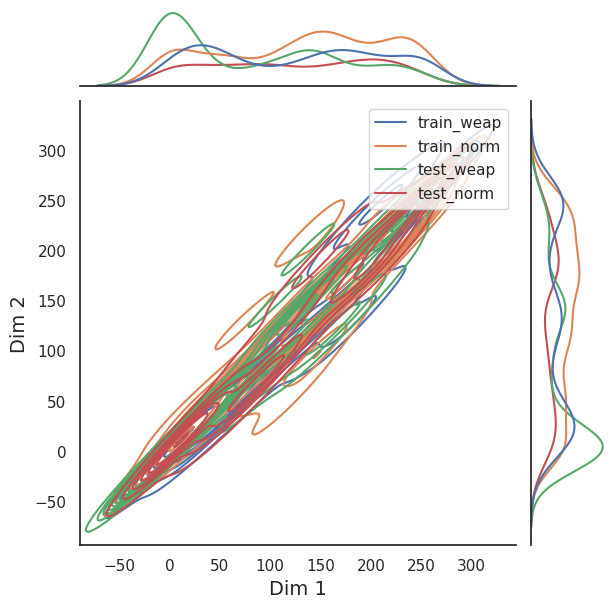

In [23]:
# Create a joint plot with kde for the train dataset
sns.set(style='white', color_codes=True)
g = sns.jointplot(data=images, x=np.array(images)[:, 1], y=np.array(images)[:, 2], hue=np.array(labels), kind='kde')
# g = sns.jointplot(x=np.array(train_images)[:, 0], y=np.array(train_images)[:, 1], hue=np.array(train_labels), kind='kde', space=0, palette=sns.color_palette(['blue', 'red']))
g.set_axis_labels('Dim 1', 'Dim 2', fontsize=14)

# # Add the test dataset to the same plot
# g.x, g.y, g.ax_joint = np.array(test_images)[:, 0], np.array(test_images)[:, 1], g.ax_joint
# sns.kdeplot(data=np.array(test_images), color=['green', 'orange'][test_labels], fill=False, alpha=0.5, ax=g.ax_joint)

# # Set the title and legend
# plt.suptitle('Distribution of Train and Test Datasets', fontsize=16)
# handles, labels = plt.gca().get_legend_handles_labels()
# plt.legend(handles[:2] + handles[2::2], ['Train: Normal', 'Train: Weapon', 'Test: Normal', 'Test: Weapon'], loc='upper right', fontsize=12)

# Show the plot
plt.show()